# Exploration of the MSA

Imports:

In [15]:
from Bio import AlignIO
from Bio.SeqUtils import seq1
import matplotlib.pyplot as plt
import logomaker
import py3Dmol
from collections import Counter
import pandas as pd

import warnings

warnings.filterwarnings("ignore")

Define helper functions:

In [16]:
def calculate_conservation(alignment, start=None, end=None, residues=None):
    cons_data = []
    for i in range(alignment.get_alignment_length()):
        column = alignment[:, i]  
        counter = Counter(column)
        total = sum(counter.values())
        most_common = counter.most_common(1)[0]  # Most common residue
        cons_data.append((i+1, most_common[0], most_common[1] / total * 100))  # Position, Residue, Conservation %

    # Filter by range or specific residues
    if start and end:
        cons_data = [data for data in cons_data if start <= data[0] <= end]
    elif residues:
        cons_data = [data for data in cons_data if data[1] in residues]

    return cons_data

def calculate_conservation_specific_positions(alignment, positions):
    cons_data = []
    
    for pos in positions:
        column = alignment[:, pos - 1]  # Align position is 1-based, so we adjust
        counter = Counter(column)
        total = sum(counter.values())
        most_common = counter.most_common(1)[0]  # Most common residue
        cons_data.append((pos, most_common[0], most_common[1] / total * 100))  # Position, Residue, Conservation %
    
    return cons_data

In [18]:
color_dict = {
    'A': 'cyan',    # Alanine (hydrophobic)
    'C': 'yellow',  # Cysteine (polar, sulfur-containing)
    'D': 'red',     # Aspartic acid (negatively charged)
    'E': 'red',     # Glutamic acid (negatively charged)
    'F': 'green',   # Phenylalanine (aromatic, hydrophobic)
    'G': 'lightblue',  # Glycine (small, neutral)
    'H': 'blue',    # Histidine (positively charged, aromatic)
    'I': 'orange',  # Isoleucine (hydrophobic)
    'K': 'blue',    # Lysine (positively charged)
    'L': 'orange',  # Leucine (hydrophobic)
    'M': 'pink',    # Methionine (hydrophobic, sulfur-containing)
    'N': 'purple',  # Asparagine (polar)
    'P': 'brown',   # Proline (nonpolar, rigid)
    'Q': 'purple',  # Glutamine (polar)
    'R': 'blue',    # Arginine (positively charged)
    'S': 'magenta', # Serine (polar)
    'T': 'magenta', # Threonine (polar)
    'V': 'orange',  # Valine (hydrophobic)
    'W': 'green',   # Tryptophan (aromatic, hydrophobic)
    'Y': 'green'    # Tyrosine (aromatic, polar)
}

# Function to plot sequence logo for specific range
def plot_sequence_logo_range(alignment, start=None, end=None):
    # Create a sequence logo for a specific region
    alignment_array = ["".join(record.seq) for record in alignment]  # Each record is a sequence string
    df = logomaker.alignment_to_matrix(sequences=alignment_array)

    if start and end:
        df = df.iloc[start-1:end]

    logomaker.Logo(df, color_scheme=color_dict)
    plt.title(f"Sequence Logo from position {start} to {end}")
    plt.show()

In [19]:
def visualize_structure(pdb_id, conserved_residues=None):
    view = py3Dmol.view(query=f'pdb:{pdb_id}')
    view.setStyle({'cartoon': {'color': 'spectrum'}})
    view.setStyle({'chain':'A'},{'cartoon': {'color':'orange'}})
    view.setStyle({'chain':'B'},{'cartoon': {'color':'grey'}})
    #And we finally visualize the structures using the command below
    view.setStyle({'chain': 'A', 'resi': ['94', '120', '121', '138', '141', '143', '146']}, {'cartoon': {'color': 'blue'}})
    view.setStyle({'chain': 'B', 'resi': ['182']}, {'cartoon': {'color': 'blue'}})
    view.setStyle({'resn': 'SAM'}, {'stick': {'colorscheme': 'cyanCarbon'}})
    
    if conserved_residues:
        # Highlight the conserved residues in red
        for resi in conserved_residues:
            view.addStyle({'resi': str(resi)}, {'stick': {'color': 'red'}})

    view.zoomTo()
    return view

## Analysies

In [20]:
alignment_file = "blast_res_250_clustalo.fasta"  
alignment = AlignIO.read(alignment_file, "fasta")


# Hyperparameters
start = 161 + 8  # Replace with your desired start position
end = 168 + 8   # Replace with your desired end position
residues = None

### MSA visualization

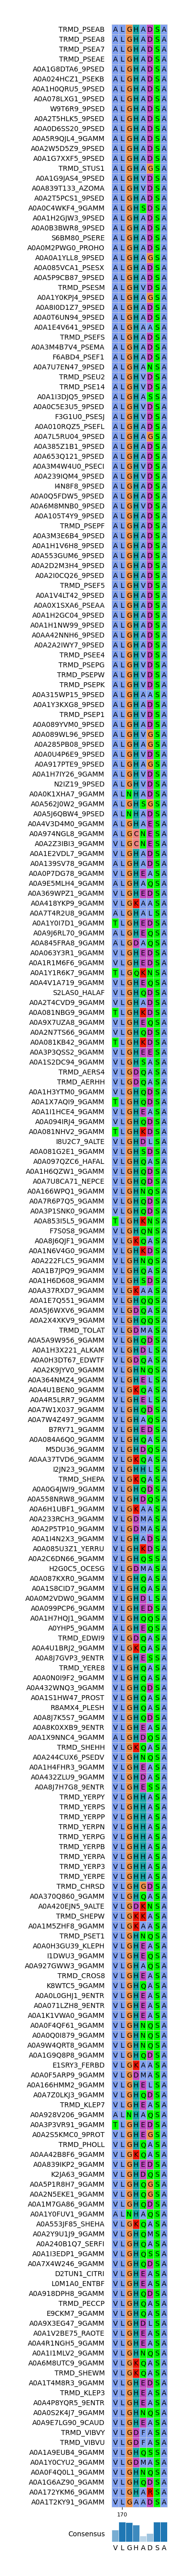

In [21]:
from pymsaviz import MsaViz, get_msa_testdata
from PIL import Image
from IPython.display import display

msa_file = "blast_res_250_clustalo.fasta"
msaviz = MsaViz(msa_file, color_scheme="Clustal", wrap_length=80,
                show_consensus=True, show_grid=True, start=start, end=end)
msaviz.savefig("msa.png")

# Load png using 
img = Image.open("msa.png")
display(img)



In [22]:
conservation_data = calculate_conservation(alignment, start=start, end=end, residues=residues)

# Print the conservation data
print("Conservation Data (Position, Residue, Conservation %):")
for data in conservation_data:
    print(data)

Conservation Data (Position, Residue, Conservation %):
(169, 'V', 60.4)
(170, 'L', 100.0)
(171, 'G', 98.4)
(172, 'H', 86.0)
(173, 'A', 30.8)
(174, 'D', 44.0)
(175, 'S', 100.0)
(176, 'A', 100.0)


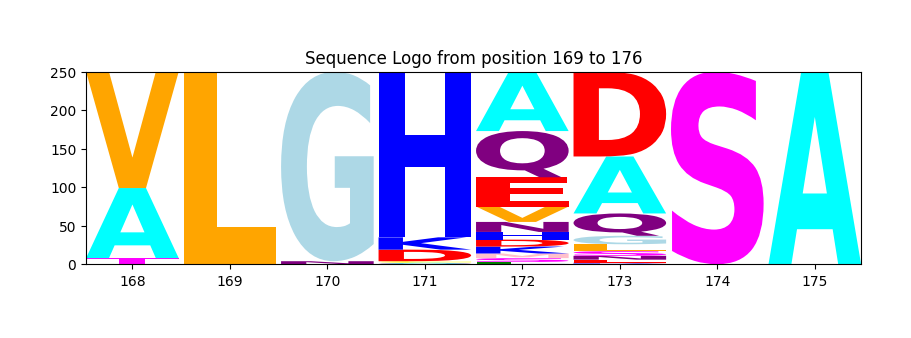

In [23]:
plot_sequence_logo_range(alignment, start=start, end=end)

In [24]:
pdb_id = "5wyq"  # Replace with your PDB ID
visualize_structure(pdb_id, conserved_residues=None)  # Replace with your conserved positions

3Dmol.js failed to load for some reason. Please check your browser console for error messages.